## importing the packages. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# importing the datasets.

In [3]:
df = pd.read_csv('dataset/train.csv')

### Exploring the Training Dataset.

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


#### Column item _weight and outlet_size contains null values.

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2674d850b8>,
      dtype=object)

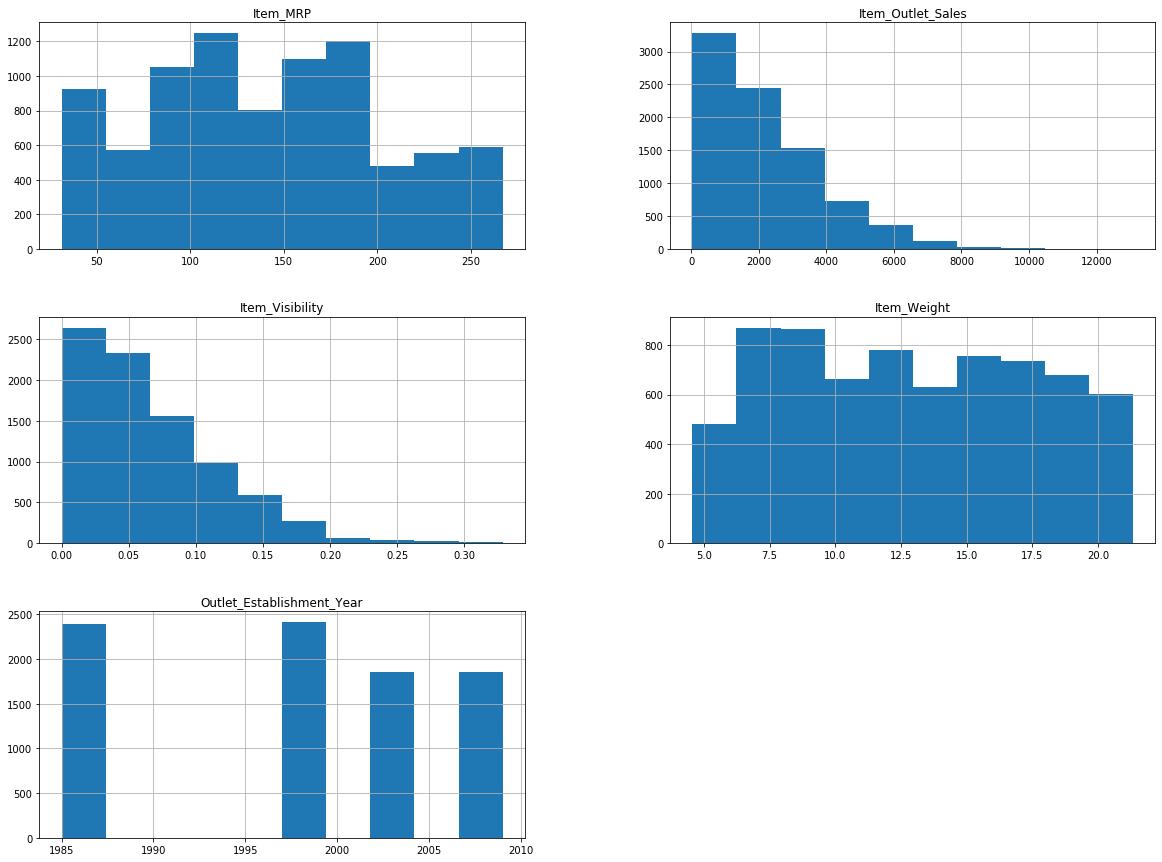

In [7]:
df.hist(figsize=(20,15))

## Let's see corelation between targets and features.

In [8]:
corr_matrix = df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

### From the correlation above we can see that the Item_MRP seems to have a good correlation with targeted Item_Outlet_Sales and looks like other columns are not very useful for prediction of target value




### So Lets start checking columns relation with Target Item_Outlet_Sales Price

In [9]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### In the above Value Counts we can see we have two main categories Low Fat and Regular the remaining LF and low fat are belongs to Low Fat and reg belongs to Regular.

#### So we can replace the wrong categories with the correct one.

In [10]:
df.Item_Fat_Content = df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content = df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content = df.Item_Fat_Content.replace('low fat','Low Fat')

In [11]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Since ITEM_WEIGHT column correlation strength is very low so we can drop it

In [12]:
df.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDO19     9
FDV38     9
DRE49     9
FDW26     9
DRN47     9
FDX04     9
NCY18     9
NCL31     9
FDU12     9
NCI54     9
FDG09     9
FDW49     9
FDT07     9
FDD38     9
FDV60     9
FDQ40     9
FDP25     9
FDX20     9
NCQ06     9
NCJ30     9
FDX31     9
FDF52     9
FDF56     9
NCF42     9
NCB18     9
DRP35     8
DRF27     8
FDS52     8
         ..
NCG19     2
FDR03     2
FDT33     2
FDM16     2
FDZ50     2
FDW58     2
FDH22     2
FDR57     2
FDI36     2
FDM38     2
FDE39     2
FDP15     2
DRI59     2
FDB10     2
FDG28     2
FDU09     2
NCW30     2
NCW05     2
FDB47     2
DRL59     2
NCS41     2
FDQ60     1
FDE52     1
FDT35     1
FDY43     1
FDN52     1
FDC23     1
FDK57     1
FDO33     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

### From above output we can say that ITEM_IDENTIFIER should be categorical columns

## For further data processing we need to convert column types into their correct types

In [13]:
df.Item_Identifier = df.Item_Identifier.astype('category')
df.Item_Fat_Content = df.Item_Fat_Content.astype('category')
df.Item_Type = df.Item_Type.astype('category')
df.Outlet_Identifier = df.Outlet_Identifier.astype('category')
df.Outlet_Establishment_Year = df.Outlet_Establishment_Year.astype('int64')

df.Outlet_Type = df.Outlet_Type.astype('category')
df.Outlet_Location_Type = df.Outlet_Location_Type.astype('category')
df.Outlet_Size = df.Outlet_Size.astype('category')

### Now lets explore Item_MRP column. Correlation strength of this column with target column is very high so we need to exploit this column for further infomation about target column

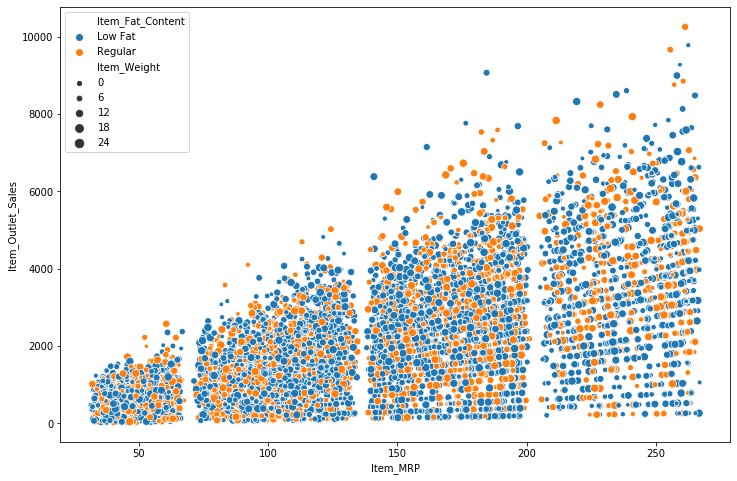

In [14]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

### Item_MRP column contain prices which are in clusters so it would be better if we convert this columnn into bins for further processing

### so for that lets describe the dataset first to see the clusters.

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


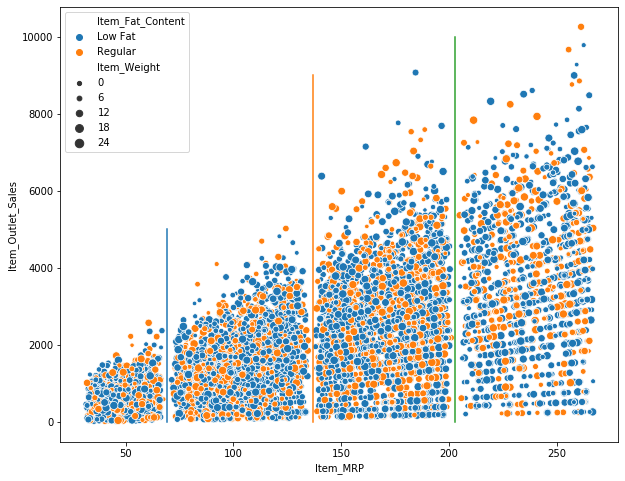

In [16]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,9000])
plt.plot([203,203],[0,10000])

### We can use these perpendicular lines to divide data into proper bins. So from above graph we got out bin value.

In [17]:
df['Item_MRP_BIN'] = pd.cut(df.Item_MRP, bins=[25, 69, 137, 203, 270], labels = ['a', 'b', 'c', 'd'], right = True)

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_BIN
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,d
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,a
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,c
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,c
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,a


### Now Explore the other columns

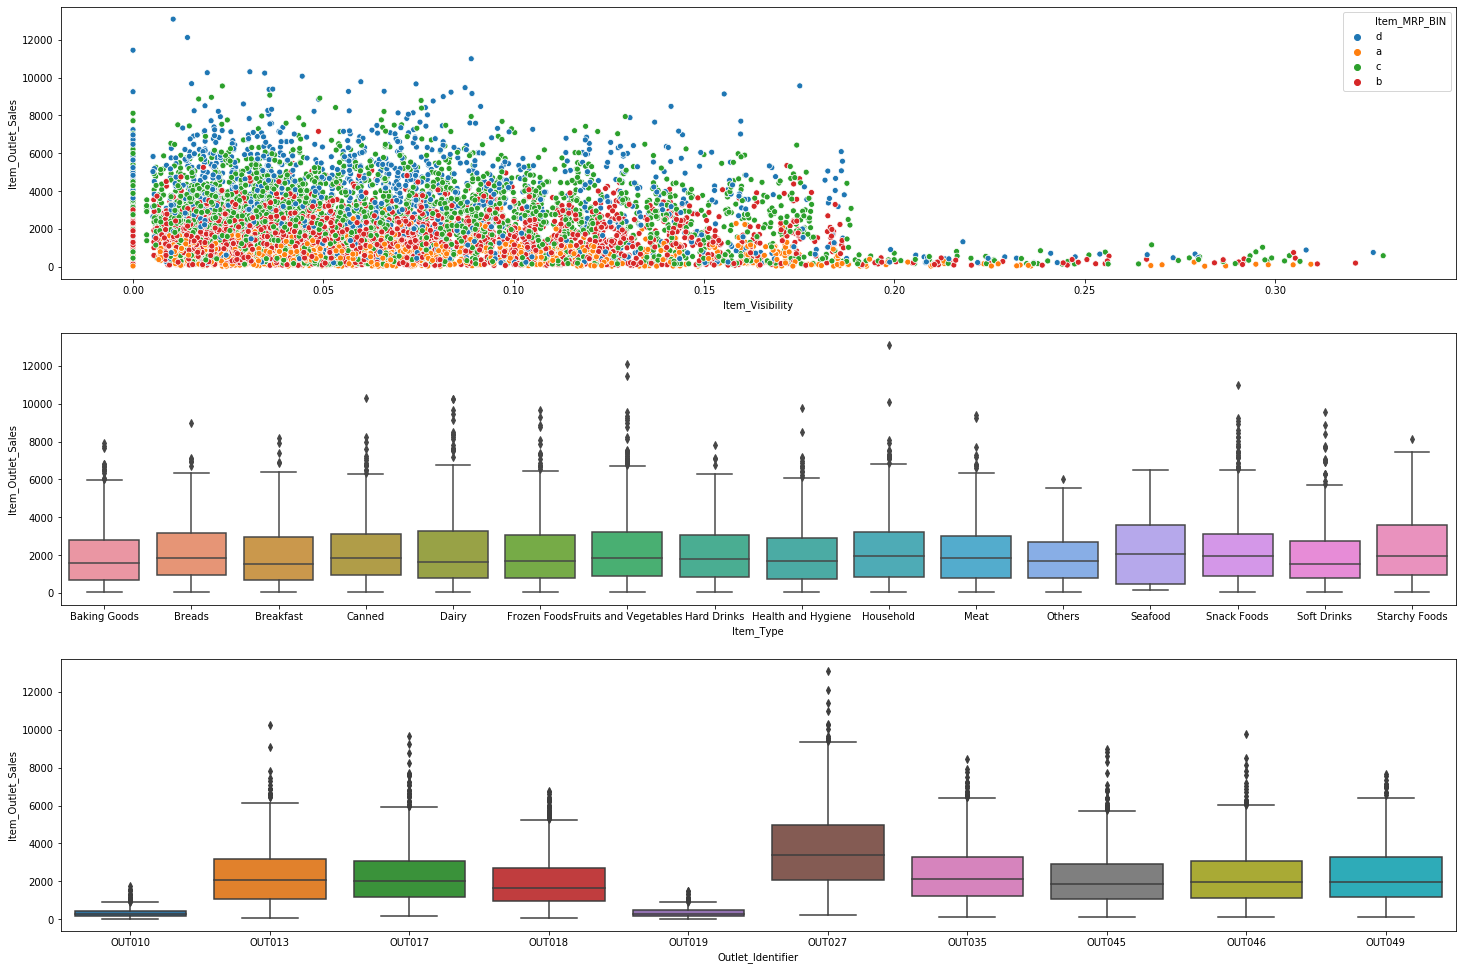

In [19]:
fig, axes = plt.subplots(3, 1, figsize = (25, 17))
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_MRP_BIN', ax = axes[0], data = df)
sns.boxplot(x = 'Item_Type', y = 'Item_Outlet_Sales', ax = axes[1], data = df)
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', ax = axes[2], data = df)

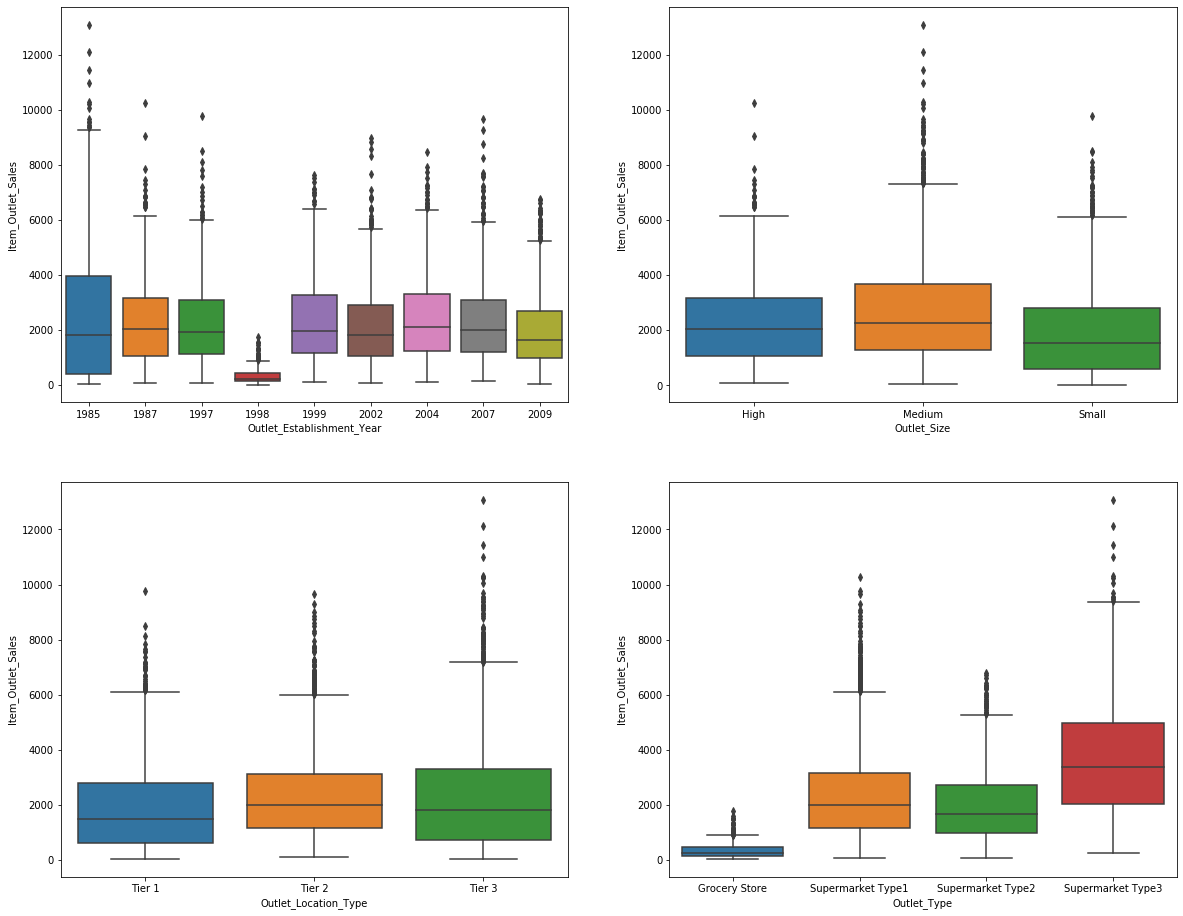

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (20, 16))
sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', ax = axes[0, 0], data = df)
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', ax = axes[0, 1], data = df)
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', ax = axes[1, 0], data = df)
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', ax = axes[1, 1], data = df)

### From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . Further more both of these column have very low correlation strength with target column

### From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . Further more both of these column have very low correlation strength with target column

In [21]:
attributes=['Item_MRP', 'Item_MRP_BIN', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Establishment_Year', 'Outlet_Identifier', 'Item_Type', 'Item_Outlet_Sales']

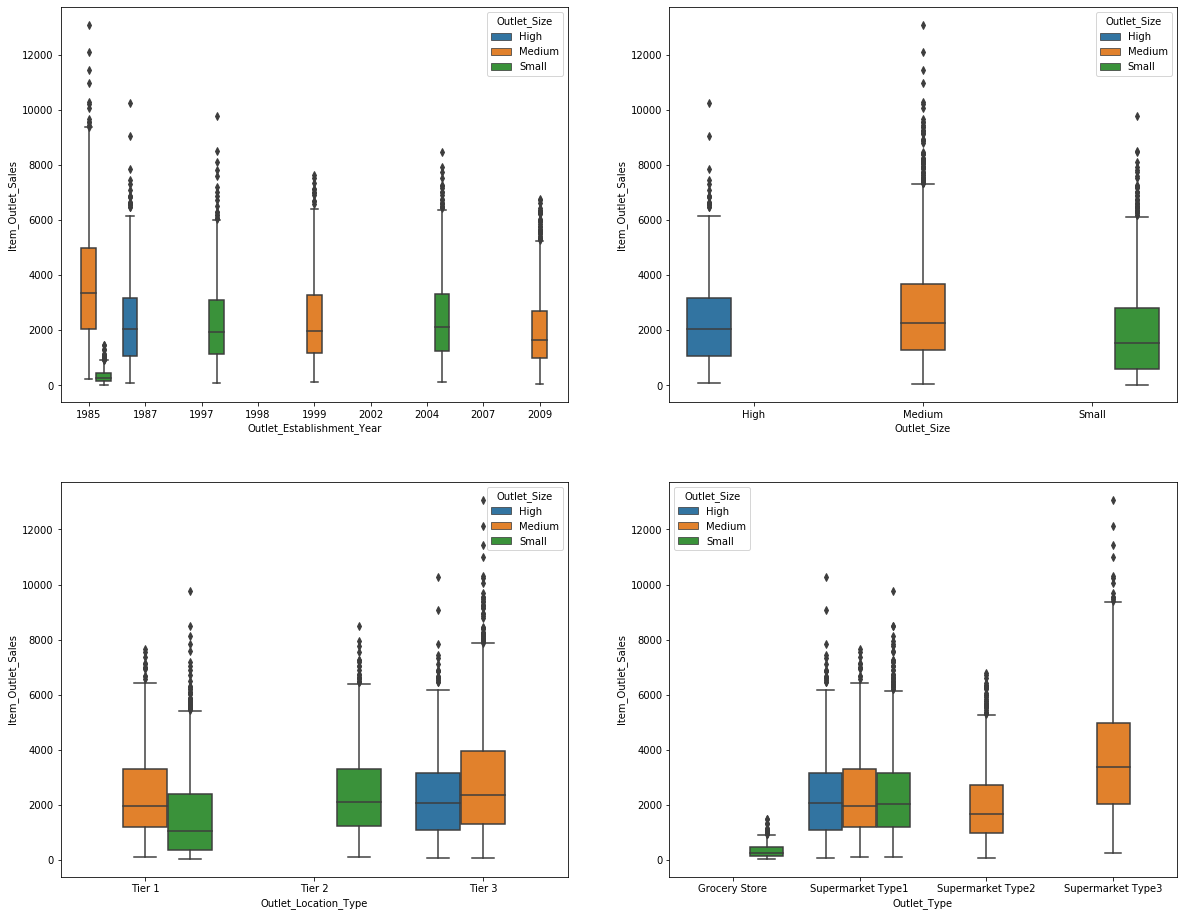

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (20,16))
sns.boxplot(x ='Outlet_Establishment_Year', y = 'Item_Outlet_Sales', hue = 'Outlet_Size', ax=axes[0,0], data = df)
sns.boxplot(x = 'Outlet_Size',y = 'Item_Outlet_Sales', hue = 'Outlet_Size', ax = axes[0,1], data = df)
sns.boxplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales', hue = 'Outlet_Size', ax = axes[1,0], data = df)
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Size', ax=axes[1,1], data = df)

### Exploration of more attributes in the data

In [23]:
data = df[attributes]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_MRP                     8523 non-null float64
Item_MRP_BIN                 8523 non-null category
Outlet_Type                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Size                  6113 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null category
Item_Type                    8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(6), float64(2), int64(1)
memory usage: 251.5 KB


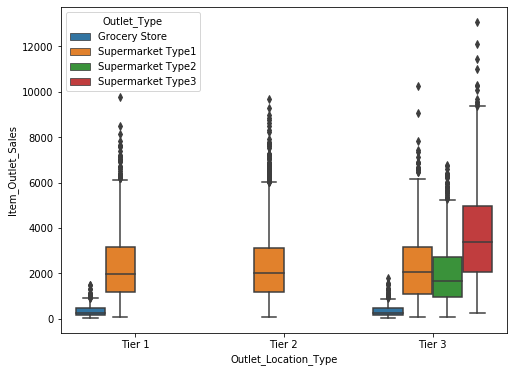

In [25]:
fig, axes = plt.subplots(1, 1, figsize = (8, 6))

sns.boxplot(y = 'Item_Outlet_Sales', hue = 'Outlet_Type', x = 'Outlet_Location_Type', data = data)

In [26]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Item_MRP_BIN,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,182.0950,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,96.9726,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,187.8214,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,45.9060,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,45.5086,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
30,55.7956,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
33,93.1436,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Breads,2174.5028
45,178.1002,c,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,358.2004
46,153.3024,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Health and Hygiene,2428.8384
47,265.2226,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,5815.0972


### from the above data we can see that, when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null

In [27]:
data.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [28]:
data.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Item_MRP_BIN,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,182.0950,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,107.6938,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,45.5086,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,43.6454,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,55.7956,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
45,178.1002,c,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,358.2004
49,196.8794,c,Grocery Store,Tier 1,Small,1985,OUT019,Dairy,780.3176
59,180.0344,c,Grocery Store,Tier 1,Small,1985,OUT019,Canned,892.1720
63,51.0692,a,Grocery Store,Tier 1,Small,1985,OUT019,Frozen Foods,147.8076
65,185.4266,c,Grocery Store,Tier 3,NaN,1998,OUT010,Snack Foods,184.4266


In [29]:
data.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [30]:
(data.Outlet_Identifier == 'OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [31]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

### Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop

### Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [32]:
data.head()

,Item_MRP,Item_MRP_BIN,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,249.8092,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,48.2692,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,141.6180,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,182.0950,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
4,53.8614,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


In [33]:
def function_replacing_null_Values(x):
    if x == 'OUT010' :
        return 'High'
    elif x == 'OUT045' :
        return 'Medium'
    elif x == 'OUT017' :
        return 'Medium'
    elif x == 'OUT013' :
        return 'High'
    elif x == 'OUT046' :
        return 'Small'
    elif x == 'OUT035' :
        return 'Small'
    elif x == 'OUT019' :
        return 'Small'
    elif x == 'OUT027' :
        return 'Medium'
    elif x == 'OUT049' :
        return 'Medium'
    elif x == 'OUT018' :
        return 'Medium'

In [34]:
# using Function to fill null values.

data['Outlet_Size'] = data.Outlet_Identifier.apply(function_replacing_null_Values)

In [35]:
data.head()

,Item_MRP,Item_MRP_BIN,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,249.8092,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,48.2692,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,141.6180,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,182.0950,c,Grocery Store,Tier 3,High,1998,OUT010,Fruits and Vegetables,732.3800
4,53.8614,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


In [36]:
# checking the dataframe, either we have complete dataset or do we have some null values in dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_MRP                     8523 non-null float64
Item_MRP_BIN                 8523 non-null category
Outlet_Type                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Size                  8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null category
Item_Type                    8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(5), float64(2), int64(1), object(1)
memory usage: 309.7+ KB


In [37]:
# changing the data type of the Outlet_Size to categorical type.

data.Outlet_Size = data.Outlet_Size.astype('category')

In [38]:
data.Outlet_Size.unique()

[Medium, High, Small]
Categories (3, object): [Medium, High, Small]

## Now lets explore other OUTLIERS for the target column.

In [39]:
data.head()

,Item_MRP,Item_MRP_BIN,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,249.8092,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,48.2692,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,141.6180,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,182.0950,c,Grocery Store,Tier 3,High,1998,OUT010,Fruits and Vegetables,732.3800
4,53.8614,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


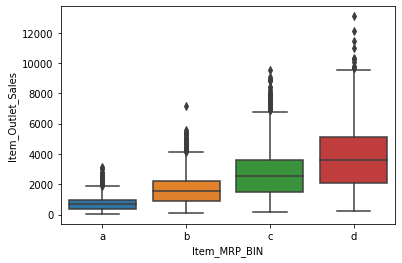

In [40]:
sns.boxplot(x='Item_MRP_BIN',y='Item_Outlet_Sales',data=data)

In [41]:
data[data.Item_MRP_BIN=='b'].Item_Outlet_Sales.max()

7158.6816

In [42]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Item_MRP_BIN,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,222.5088,d,Supermarket Type3,Tier 3,Medium,1985,OUT027,Breads,7158.6816
7796,125.9336,b,Supermarket Type3,Tier 3,Medium,1985,OUT027,Household,7158.6816


In [43]:
data=data.drop(index=7796)
data.groupby('Item_MRP_BIN').get_group('b')['Item_Outlet_Sales'].max()

5582.733

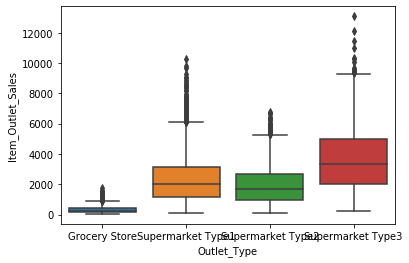

In [44]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

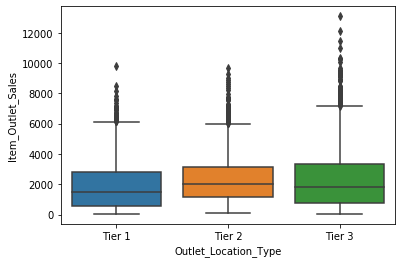

In [45]:
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = data)

In [46]:
data[data.Outlet_Location_Type == 'Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [47]:
data[data['Item_Outlet_Sales'] == 9779.9362]

,Item_MRP,Item_MRP_BIN,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,262.5226,d,Supermarket Type1,Tier 1,Small,1997,OUT046,Health and Hygiene,9779.9362


In [48]:
data.drop(index=4289, inplace = True)

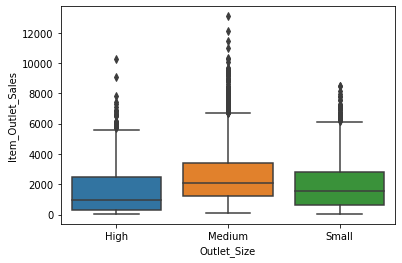

In [49]:
sns.boxplot(x='Outlet_Size', y = 'Item_Outlet_Sales', data = data)

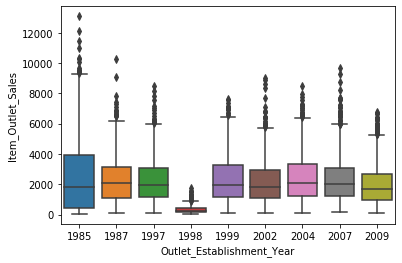

In [50]:
sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = data)

In [51]:
# now lets see the data types of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8521 entries, 0 to 8522
Data columns (total 9 columns):
Item_MRP                     8521 non-null float64
Item_MRP_BIN                 8521 non-null category
Outlet_Type                  8521 non-null category
Outlet_Location_Type         8521 non-null category
Outlet_Size                  8521 non-null category
Outlet_Establishment_Year    8521 non-null int64
Outlet_Identifier            8521 non-null category
Item_Type                    8521 non-null category
Item_Outlet_Sales            8521 non-null float64
dtypes: category(6), float64(2), int64(1)
memory usage: 637.9 KB


In [52]:
# as we can see from the above table that Outlet_Establishment_Year have data type of int64,
# we can change it to the categorical type as we can see it in the graphical representation above.


data.Outlet_Establishment_Year = data.Outlet_Establishment_Year.astype('category')

### Now lets remove the Item_MRP column and make the Item_MRP_BIN column to Item_MRP column for better categorical data.

In [53]:
data = data[['Item_MRP_BIN', 'Outlet_Type', 'Outlet_Location_Type',
       'Outlet_Size', 'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Item_Type', 'Item_Outlet_Sales']]

In [54]:
data.columns = ['Item_MRP', 'Outlet_Type', 'Outlet_Location_Type',
       'Outlet_Size', 'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Item_Type', 'Item_Outlet_Sales']

In [55]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,High,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


## Lets create the dataset for training the ML model.

In [56]:
data_label = data.Item_Outlet_Sales
dataset = pd.get_dummies(data.iloc[:,0:6])

In [57]:
# adding the labeled output data in the dataset.

dataset['Item_Outlet_Sales'] = data_label

In [58]:
# checking the shape of the dataset.

dataset.shape

(8521, 34)

In [59]:
#checking the top 5 rows of the dataset.

dataset.head(5)

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,443.4228
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,732.3800
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,994.7052


In [60]:
dataset.to_csv('dataset/dataset_for_ML.csv')